In [2]:
import pandas as pd

# Analise exploratória referente ao Titanic

In [29]:
titanicdata = pd.read_csv('https://raw.githubusercontent.com/advinstai/python-datascience/master/Exercicios/titanic/train.csv')
titanicdata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanicdata.describe()

# Definindo uma pergunta sobre o acidente
* Fatores que determinaram mortes

# Visualizando variáves que contabilizaram mortes
* survivors 1
* nonsurv 0

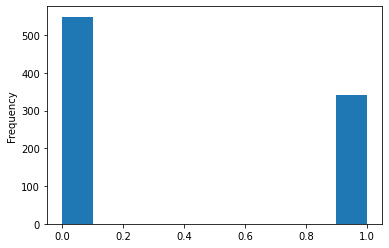

In [6]:
titanicdata['Survived'].plot(kind='hist')

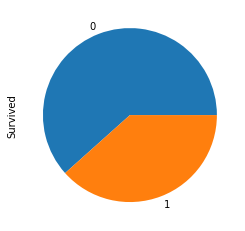

In [11]:
pd.value_counts(titanicdata['Survived']).plot.pie()

# Limpeza de dados

In [31]:
titanicdata.drop('Name',inplace=True, axis=1)
titanicdata.drop('Ticket',inplace=True, axis=1)


# Valores categóricos

In [34]:
categorical_values = ['Sex', 'Embarked', 'Cabin']

for val in categorical_values:
    titanicdata[val] = titanicdata[val].astype('category')
print(titanicdata.info())

cat_columns = titanicdata.select_dtypes(['category']).columns
print ("cat_columns")
print(cat_columns)
titanicdata[cat_columns] = titanicdata[cat_columns].apply(lambda x: x.cat.codes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(5)
memory usage: 58.7 KB
None
cat_columns
Index(['Sex', 'Cabin', 'Embarked'], dtype='object')


# Valores ausentes
* valores categoricos preenchidos com medianas
* valores contínuos preenchidos com medias

In [35]:
# valores categoricos preenchidos com medianas
for val in categorical_values:
    titanicdata[val].fillna(titanicdata[val].median(), inplace=True)
    
# valores contínuos preenchidos com medias
for val in ["Age", "Fare", "Pclass", "SibSp"]:
    titanicdata[val].fillna(titanicdata[val].mean(), inplace=True)

# Comparando variaveis
* idade e Sobrevivencia
* Sexo e Sobrevivencia

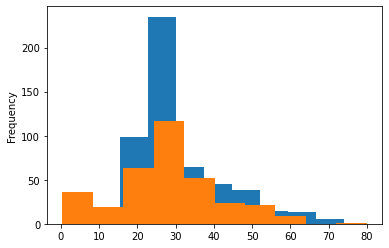

In [38]:
nonsurv = titanicdata[titanicdata['Survived'] == 0]
nonsurv['Age'].plot(kind='hist')
surv = titanicdata[titanicdata['Survived'] == 1]
surv['Age'].plot(kind='hist')

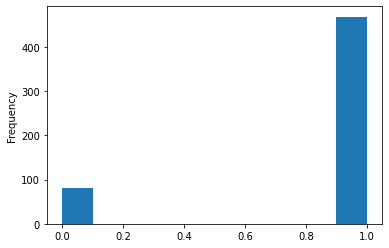

In [40]:
nonsurv = titanicdata[titanicdata['Survived'] == 0]
nonsurv['Sex'].plot(kind='hist')

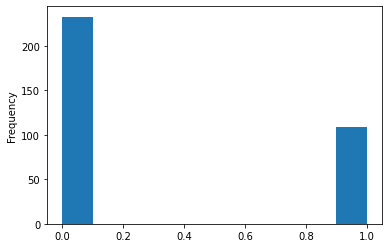

In [41]:
surv = titanicdata[titanicdata['Survived'] == 1]
surv['Sex'].plot(kind='hist')

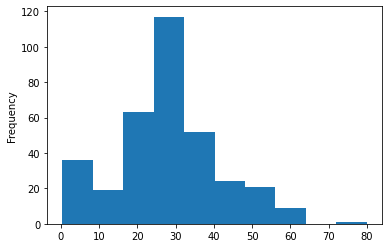

In [37]:
nonsurv = titanicdata[titanicdata['Survived'] == 1]
nonsurv['Age'].plot(kind='hist')